In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
print('Libraries Imported')
pd.__version__

Libraries Imported


'1.3.5'

In [2]:
data=pd.read_csv('/content/stress data.csv') 

In [3]:
data.head(2)

,Timestamp,Name (with initials),Age,Gender,Professional Status,How often are you able to stay focused on the present moment?,How much time would you spend on using your mobile phone per day?,Do you fall asleep easily at night?(The average person falls asleep in 7-10 minutes).,"On average, how many hours would you sleep per day?",How would you feel while facing trivial issues(not serious issues) ?,...,Felt that you were unable to control important things in your life?,Give some reasons for your stress.,Would you speak openly about your feelings when angry or stressed?,"Do you feel like withdrawing from family, friends and isolating yourself?",Would you face any health issues because of your stress?,How do you rate your stress level?,What does stress feel like to you?,Who is one person that understands your stress?,Where and when do you feel most relaxed?,Unnamed: 20
0,04-07-2022 22:17,Sangeetha S,20-30,Female,Student,Almost Always,4-6 hrs,Yes,5-7 hours,Calm or normal,...,Sometimes,Work pressure,Sometimes,No,No,Medium,Restlessness,Yourself,While sleeping,NaN
1,04-07-2022 22:20,Anto Jeffry A,20-30,Male,Student,Sometimes,6-7 hrs,Maybe,5-7 hours,Feeling irritated,...,Sometimes,Personal issues,Sometimes,Yes,yes,High,Anxiety or depression,Best friend,While gaming,NaN


In [4]:
print(len(data))

510


In [5]:
data.dtypes

Timestamp                                                                                object
Name (with initials)                                                                     object
Age                                                                                      object
Gender                                                                                   object
Professional Status                                                                      object
How often are you able to stay focused on the present moment?                            object
How much time would you spend on using your mobile phone per day?                        object
Do you fall asleep easily at night?(The average person falls asleep in 7-10 minutes).    object
On average, how many hours would you sleep per day?                                      object
How would you feel while facing trivial issues(not serious issues) ?                     object
During work hours(or while studying), ho

In [6]:
data.shape

(510, 21)

In [7]:
data.columns = ['new_col1', 'new_col2', 'new_col3', 'new_col4','new_col5','new_col6','new_col7','new_col8','new_col9','new_col10','new_col11','new_col12','new_col13','new_col14','new_col15','new_col16','new_col17','new_col18','new_col19','new_col20','new_col21']


In [8]:
data.head(2)

,new_col1,new_col2,new_col3,new_col4,new_col5,new_col6,new_col7,new_col8,new_col9,new_col10,...,new_col12,new_col13,new_col14,new_col15,new_col16,new_col17,new_col18,new_col19,new_col20,new_col21
0,04-07-2022 22:17,Sangeetha S,20-30,Female,Student,Almost Always,4-6 hrs,Yes,5-7 hours,Calm or normal,...,Sometimes,Work pressure,Sometimes,No,No,Medium,Restlessness,Yourself,While sleeping,NaN
1,04-07-2022 22:20,Anto Jeffry A,20-30,Male,Student,Sometimes,6-7 hrs,Maybe,5-7 hours,Feeling irritated,...,Sometimes,Personal issues,Sometimes,Yes,yes,High,Anxiety or depression,Best friend,While gaming,NaN


In [9]:
data.drop(['new_col1', 'new_col2','new_col21'], axis = 1, inplace=True)

In [10]:
data.dtypes

new_col3     object
new_col4     object
new_col5     object
new_col6     object
new_col7     object
new_col8     object
new_col9     object
new_col10    object
new_col11    object
new_col12    object
new_col13    object
new_col14    object
new_col15    object
new_col16    object
new_col17    object
new_col18    object
new_col19    object
new_col20    object
dtype: object

In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data.new_col17)
data['class'] = le.transform(data.new_col17)


In [12]:
data.shape

(510, 19)

In [13]:
data.drop(['new_col17'], axis = 1 , inplace=True)

In [14]:
data.head(10)

,new_col3,new_col4,new_col5,new_col6,new_col7,new_col8,new_col9,new_col10,new_col11,new_col12,new_col13,new_col14,new_col15,new_col16,new_col18,new_col19,new_col20,class
0,20-30,Female,Student,Almost Always,4-6 hrs,Yes,5-7 hours,Calm or normal,Focused,Sometimes,Work pressure,Sometimes,No,No,Restlessness,Yourself,While sleeping,2
1,20-30,Male,Student,Sometimes,6-7 hrs,Maybe,5-7 hours,Feeling irritated,Distraction,Sometimes,Personal issues,Sometimes,Yes,yes,Anxiety or depression,Best friend,While gaming,0
2,20-30,Male,Unemployed,Sometimes,More than 7 hrs,Yes,less than 5 hours,Feeling irritated,Concentrating,Sometimes,Personal issues,Often,No,No,Restlessness,Best friend,While spending time with your friends or family,2
3,20-30,Male,Student,Almost Always,Less than 4hrs,Yes,7-8 hours,Calm or normal,Focused,Never,Personal issues,Sometimes,No,No,Lack of motivation or focus,Yourself,While spending time with your friends or family,1
4,20-30,Male,Student,Sometimes,4-6 hrs,No,5-7 hours,Calm or normal,Focused,Always,Personal issues,Sometimes,No,No,Lack of motivation or focus,Best friend,While spending time with your friends or family,2
5,20-30,Female,Student,Sometimes,4-6 hrs,No,7-8 hours,Feeling irritated,Focused,Often,Personal issues,Always,No,No,Lack of motivation or focus,Father or mother,While sleeping,2
6,20-30,Male,Student,Sometimes,6-7 hrs,No,5-7 hours,Feeling irritated,Distraction,Sometimes,Personal issues,Sometimes,Yes,yes,Anxiety or depression,Best friend,While spending time with your friends or family,0
7,20-30,Male,Student,Sometimes,More than 7 hrs,Maybe,5-7 hours,Calm or normal,Concentrating,Sometimes,Work pressure,Often,No,No,Lack of motivation or focus,Best friend,While spending time with your friends or family,2
8,20-30,Female,Student,Sometimes,Less than 4hrs,No,More than 8 hours,Calm or normal,Concentrating,Never,Work pressure,Always,No,No,Restlessness,None,While sleeping,2
9,less than 15,Male,Student,Sometimes,Less than 4hrs,No,7-8 hours,Angry,Distraction,Sometimes,Work pressure,Sometimes,No,No,Restlessness,Brother,While spending time with your friends or family,2


In [15]:
data.shape

(510, 18)

In [16]:
data.isnull().sum()

new_col3     0
new_col4     0
new_col5     0
new_col6     0
new_col7     0
new_col8     0
new_col9     0
new_col10    0
new_col11    0
new_col12    2
new_col13    0
new_col14    3
new_col15    4
new_col16    0
new_col18    3
new_col19    3
new_col20    0
class        0
dtype: int64

In [17]:
d = data.dropna()

In [18]:
d.shape

(505, 18)

In [19]:
d.isnull().sum()

new_col3     0
new_col4     0
new_col5     0
new_col6     0
new_col7     0
new_col8     0
new_col9     0
new_col10    0
new_col11    0
new_col12    0
new_col13    0
new_col14    0
new_col15    0
new_col16    0
new_col18    0
new_col19    0
new_col20    0
class        0
dtype: int64

In [20]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 509
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   new_col3   505 non-null    object
 1   new_col4   505 non-null    object
 2   new_col5   505 non-null    object
 3   new_col6   505 non-null    object
 4   new_col7   505 non-null    object
 5   new_col8   505 non-null    object
 6   new_col9   505 non-null    object
 7   new_col10  505 non-null    object
 8   new_col11  505 non-null    object
 9   new_col12  505 non-null    object
 10  new_col13  505 non-null    object
 11  new_col14  505 non-null    object
 12  new_col15  505 non-null    object
 13  new_col16  505 non-null    object
 14  new_col18  505 non-null    object
 15  new_col19  505 non-null    object
 16  new_col20  505 non-null    object
 17  class      505 non-null    int64 
dtypes: int64(1), object(17)
memory usage: 75.0+ KB


In [21]:
new_df =d

In [22]:
new_df.head(2)

,new_col3,new_col4,new_col5,new_col6,new_col7,new_col8,new_col9,new_col10,new_col11,new_col12,new_col13,new_col14,new_col15,new_col16,new_col18,new_col19,new_col20,class
0,20-30,Female,Student,Almost Always,4-6 hrs,Yes,5-7 hours,Calm or normal,Focused,Sometimes,Work pressure,Sometimes,No,No,Restlessness,Yourself,While sleeping,2
1,20-30,Male,Student,Sometimes,6-7 hrs,Maybe,5-7 hours,Feeling irritated,Distraction,Sometimes,Personal issues,Sometimes,Yes,yes,Anxiety or depression,Best friend,While gaming,0


In [23]:
list(new_df['new_col5'].value_counts()[0:5].keys())

['Student', 'Employed', 'Unemployed', 'Entrepreneur', 'Freelancer']

In [24]:
list(new_df['new_col18'].value_counts()[0:5].keys())

['Restlessness',
 'Lack of motivation or focus',
 'Anxiety or depression',
 'Angry outbursts',
 'All of the above ']

In [25]:
d = pd.get_dummies(d, columns=['new_col3', 'new_col4', 'new_col5', 'new_col6', 'new_col7', 'new_col8',
       'new_col9', 'new_col10', 'new_col11', 'new_col12', 'new_col13',
       'new_col14', 'new_col15', 'new_col16', 'new_col18', 'new_col19',
       'new_col20'])

In [26]:
d.columns

Index(['class', 'new_col3_20-30', 'new_col3_30-40', 'new_col3_above 40',
       'new_col3_less than 15', 'new_col3_less than 20', 'new_col4_Female',
       'new_col4_Male', 'new_col5_Employed', 'new_col5_Entrepreneur',
       ...
       'new_col20_While traveling ', 'new_col20_While watching drama',
       'new_col20_While watching movie ', 'new_col20_With my lovable person',
       'new_col20_With someone special ', 'new_col20_playing guitar ',
       'new_col20_playing the guitar', 'new_col20_watching series',
       'new_col20_while doing swimming ', 'new_col20_with my dog'],
      dtype='object', length=218)

In [27]:
d.shape

(505, 218)

'\n\nplt.subplot(1,3,3)\nsns.countplot(x=data[\'new_col7\'], alpha=0.8, palette="Paired", hue=data[\'class\']);\nplt.tick_params(axis=\'both\', which=\'both\', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);\nsns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);\nplt.xlabel(\'\')\nplt.title(\'mobile phone usage\');\n\nplt.savefig("sub.jpg",format=\'jpg\')\n\n\n'

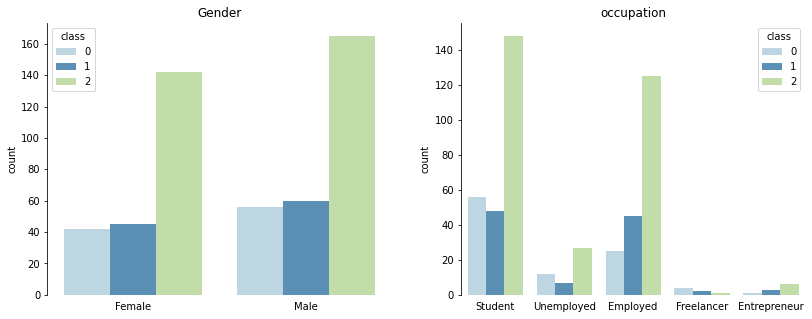

In [28]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=data['new_col4'], alpha=0.8, palette="Paired", hue=data['class']);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender');

plt.subplot(1,3,2)
sns.countplot(x=data['new_col5'], alpha=0.8, palette="Paired", hue=data['class']);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('occupation');
plt.savefig("sub.jpg",format='jpg')

'''

plt.subplot(1,3,3)
sns.countplot(x=data['new_col7'], alpha=0.8, palette="Paired", hue=data['class']);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('mobile phone usage');

plt.savefig("sub.jpg",format='jpg')


'''



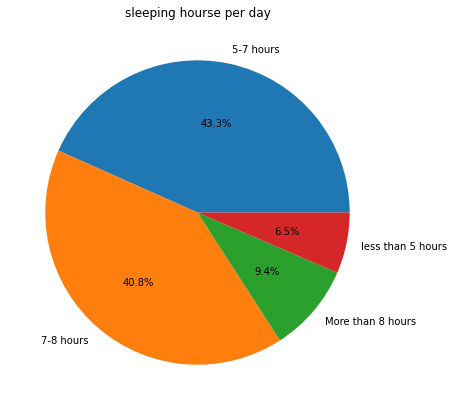

In [29]:

#how many hrs of sleep per day
plt.figure(figsize=(7,7))
plt.pie(list(data['new_col9'].value_counts()),labels=list(data['new_col9'].value_counts().keys()),autopct='%0.1f%%')
plt.title("sleeping hourse per day")
plt.savefig("sub1.jpg",format='jpg')
plt.show() 



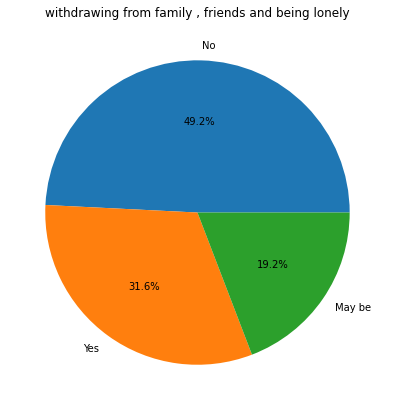

In [30]:
#withdrawing from family,friends,and isolating youself
plt.figure(figsize=(7,7))
plt.pie(list(data['new_col15'].value_counts()),labels=list(data['new_col15'].value_counts().keys()),autopct='%0.1f%%')
plt.title("withdrawing from family , friends and being lonely")
plt.savefig("sub2.jpg",format='jpg')
plt.show() 

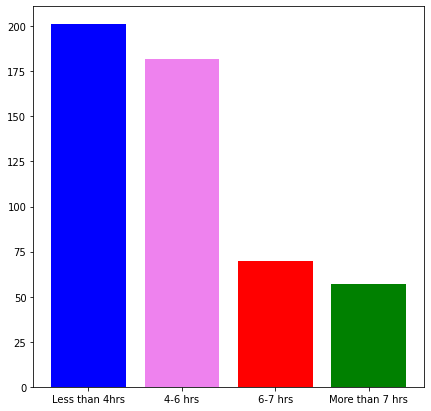

In [31]:

plt.figure(figsize=(7,7))
plt.bar(list(data['new_col7'].value_counts()[0:4].keys()),list(data['new_col7'].value_counts()[0:4]),color=("blue","violet","red","green"))
plt.show()


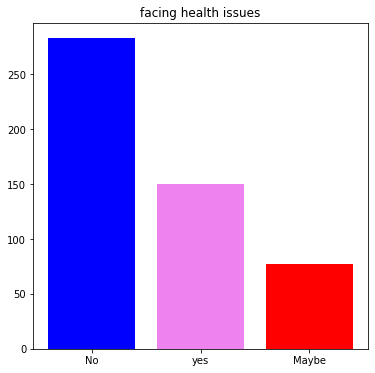

In [32]:
#facing health issues
plt.figure(figsize=(6,6))
plt.bar(list(data['new_col16'].value_counts()[0:3].keys()),list(data['new_col16'].value_counts()[0:3]),color=("blue","violet","red","green"))
plt.title("facing health issues")
plt.savefig("bar1.jpg",format='jpg')
plt.show()

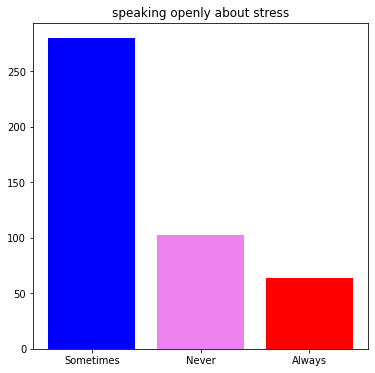

In [33]:
#speakinng openly about your stress
plt.figure(figsize=(6,6))
plt.bar(list(data['new_col14'].value_counts()[0:3].keys()),list(data['new_col14'].value_counts()[0:3]),color=("blue","violet","red","green"))
plt.title("speaking openly about stress")
plt.savefig("bar2.jpg",format='jpg')
plt.show()

'\n\nplt.subplot(1,3,3)\nsns.kdeplot(x=d[\'new_col3_above 40\'], alpha=0.2, palette="Set1", label=\'Smoker\', fill=True, linewidth=1.5, hue=data[\'class\']);\nsns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);\nplt.xlabel(\'\');\nplt.title(\'Age above 40\');\nplt.savefig("dens.jpg",format=\'jpg\')\n'

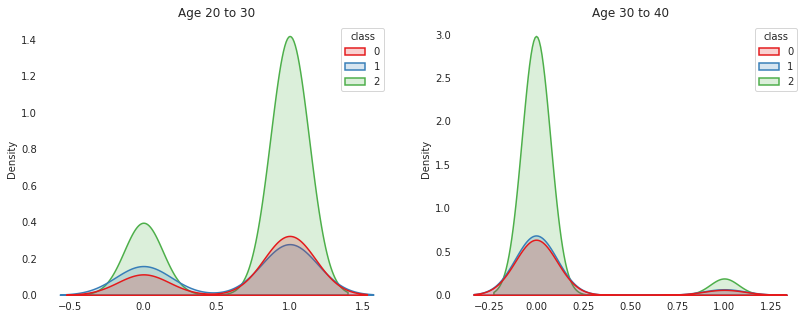

In [34]:
#density plot
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x=d['new_col3_20-30'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=data['class']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age 20 to 30');

plt.subplot(1,3,2)
sns.kdeplot(x=d['new_col3_30-40'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=data['class']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age 30 to 40');
plt.savefig("dens.jpg",format='jpg')

'''

plt.subplot(1,3,3)
sns.kdeplot(x=d['new_col3_above 40'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=data['class']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age above 40');
plt.savefig("dens.jpg",format='jpg')
'''


In [35]:
X = d.drop('class', axis = 1)
Y= d['class']
Y

0      2
1      0
2      2
3      1
4      2
      ..
504    2
505    1
507    2
508    0
509    0
Name: class, Length: 505, dtype: int64

In [36]:
Y.head(2)

0    2
1    0
Name: class, dtype: int64

In [37]:
X.shape

(505, 217)

In [38]:
Y.shape

(505,)

In [39]:
from sklearn.model_selection import train_test_split
seed=2
test=0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

Accuracy: 0.5592105263157895
precision: 0.4773218701180462
recall: 0.4621943371943373
f1score: 0.46724033816425115


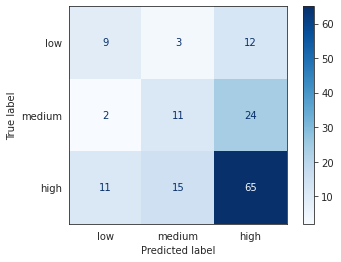

<Figure size 432x288 with 0 Axes>

In [40]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
#result = confusion_matrix(y_test, y_pred)
result = accuracy_score(y_test,y_pred)
print("Accuracy:",result)
precision=precision_score(y_test,y_pred,pos_label='positive',average='macro')
print(f"precision: {precision}")
recall=recall_score(y_test,y_pred,pos_label='positive',average='macro')
print(f"recall: {recall}")
F1=f1_score(y_test,y_pred,pos_label='positive',average='macro')
print(f"f1score: {F1}")
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
clf.fit(X_train, y_train)
plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["low","medium","high"])
plt.show()
plt.savefig("DT confusion.jpg",format='jpg')

In [41]:
seed = 2
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

precision: 0.3883072633072633
recall: 0.528546332894159
f1score: 0.36936627311445364
RandomForestClassifier: 0.6118421052631579


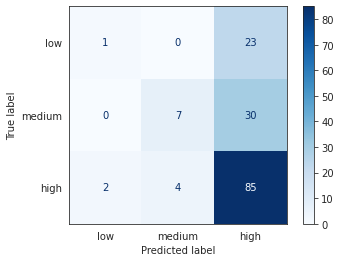

<Figure size 432x288 with 0 Axes>

In [42]:
randomforest = RandomForestClassifier(n_estimators=1000, random_state=42)
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_test)
score = accuracy_score(predictions, y_test)
precision=precision_score(predictions,y_test,pos_label='positive',average='macro')
print(f"precision: {precision}")
recall=recall_score(predictions,y_test,pos_label='positive',average='macro')
print(f"recall: {recall}")
F1=f1_score(predictions,y_test,pos_label='positive',average='macro')
print(f"f1score: {F1}")
print(f"RandomForestClassifier: {score}")
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
randomforest.fit(X_train, y_train)
plot_confusion_matrix(randomforest,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["low","medium","high"])
plt.show()
plt.savefig("RF confusion.jpg",format='jpg')